# Author: Shaik Anisa


**Prediction using Supervised ML**



**Task 1 - In this task we will predict the percentage of marks that a student is expected to 
score based upon the number of hours they studied.**

In [1]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


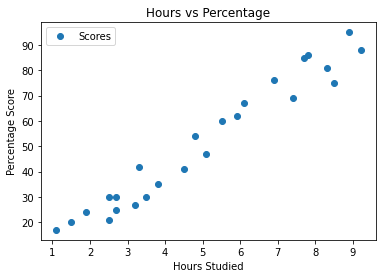

In [3]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Now Let's Prepare the data**

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Here we are going to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
#Split the dataset into test and train sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [6]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[5.1]
 [8.5]
 [7.8]
 [3.8]
 [8.9]
 [1.5]
 [3.2]
 [8.3]
 [9.2]
 [1.9]
 [3.5]
 [6.9]
 [4.5]
 [1.1]
 [5.5]
 [2.7]]
[[6.1]
 [2.5]
 [4.8]
 [2.7]
 [2.5]
 [7.7]
 [7.4]
 [3.3]
 [5.9]]
[47 75 86 35 95 20 27 81 88 24 30 76 41 17 60 25]
[67 30 54 30 21 85 69 42 62]


**Training the Algorithm**


In [7]:
#training the simple linear regression model

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train, y_train)
print("Training completed")

Training completed


**Lets Visualize the training set data**

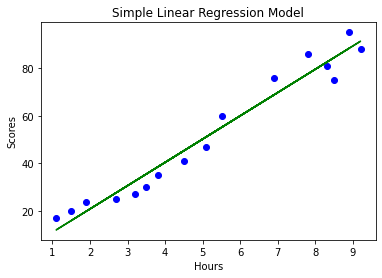

In [8]:
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x_train, slr.predict(x_train), color = "green")
plt.title("Simple Linear Regression Model")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

**Lets Visualize the test set data**



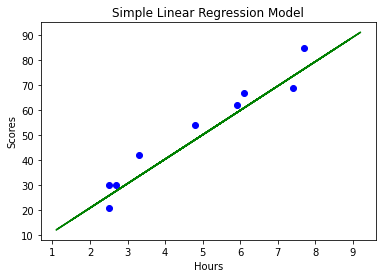

In [9]:
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_train, slr.predict(x_train), color = "green")
plt.title("Simple Linear Regression Model")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

**Lets plot the regression line**

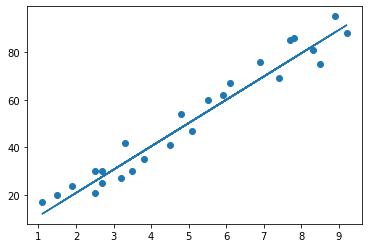

In [10]:

line = slr.coef_*x+slr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

**Make Predictions**


In [11]:
#Predicting the test set results

y_pred = slr.predict(x_test)
y_pred

array([60.96519935, 25.80760181, 48.26940024, 27.76080168, 25.80760181,
       76.59079825, 73.66099846, 33.62040127, 59.01199949])

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,67,60.965199
1,30,25.807602
2,54,48.269400
3,30,27.760802
4,21,25.807602
5,85,76.590798
6,69,73.660998
7,42,33.620401
8,62,59.011999


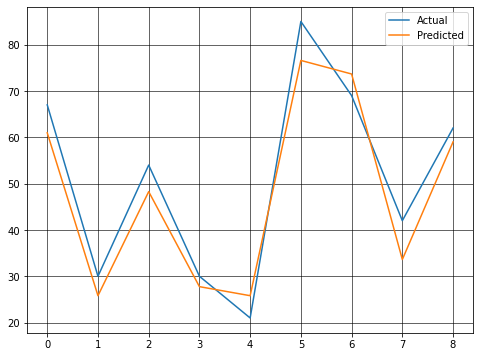

In [13]:
df.plot(kind='line',figsize=(8,6))
plt.grid(which = 'major',linewidth='0.6',color='red')
plt.grid(which = 'major',linewidth='0.6',color='black')
plt.show()

In [14]:
# testing with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = slr.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.72809719370294


**Model Evaluation**

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.271377576241541
